# Solving Time-Independant Shrodinger Equation for Harmonic Oscillator
$\hat{H}|\Psi\rangle = \hat{T} + \hat{V} |\Psi\rangle$


In [163]:
import numpy as np
import math
import matplotlib.pyplot as mlt
from numpy import pi

In [164]:
#defining all the necessary constants here
h_bar    = 1 #atomic unit
m        = 1 #mass
w        = 1 #omega
com_term = h_bar**2 /(2*m) 

In [165]:
def E_psi(div):
    H = H_psi(div)
    E, psi = np.linalg.eigh(H)
    return E
def H_psi(div):
    R = np.linspace(-10,10,div)
    x = R[1] - R[0]
    v = V(R)
    t = T_with_fourier_transform(len(R),x)
    H = v + t
    return H
def array_for_V(R):
    return 0.5 * m * w**2 * R**2
def V(R):
    V_arr = array_for_V(R)
    cap_V = np.zeros((len(R),len(R)))
    for i in range(0,len(R)):
        cap_V[i,i] = V_arr[i]
    return cap_V
def T_with_fourier_transform(n,del_x):
    k = np.pi/del_x
    cap_T = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            if(i==j):
                cap_T[i,j] = com_term * ((k**2)/3)*(1+(2/(n**2)))
            else:
                cap_T[i,j] = com_term * (2*k**2*(-1)**(j-i))/(n**2 * (np.sin(np.pi*(j-i)/n))**2)
    return cap_T     

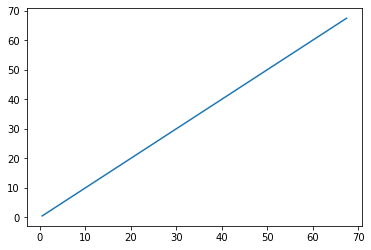

In [166]:
def err_dev(div):
    err_list = np.empty(div)
    err_list = E_psi(div)
    sum = 0
    for i in range(1,div):
        del_x = err_list[i]- err_list[i-1]
        sum += (del_x-0.5)**2
    dev = math.sqrt(sum/div)
    return dev
def plotter(limit):
    x_axis = np.empty(limit-5)
    for i in range(5,limit):
        np.append(x_axis, i)
    y_axis = np.empty(limit-5)
    for i in range(5,limit):
        temp = err_dev(i)
        np.append(y_axis, temp)
    mlt.plot(x_axis,y_axis)
plotter(50)

In [167]:
def err_calc(limit):
    sum = 0
    dev_list = np.array(limit-5)
    for i in range(5,limit+1):
        temp = E_psi(i)
        for j in range(1,i):
            x = temp[j] - temp[j-1]
            err = (x - 0.5)**2
            sum += err
        dev = math.sqrt(sum/i)
        np.append(dev_list,dev)
        sum = 0
    return dev_list
def plt(limit):
    x_axis = np.array(limit-5)
    x_axis = range(5,limit)
    y_axis = np.array(limit-5)
    y_axis = err_calc(limit)
    mlt.plot(x_axis,y_axis)

In [180]:
y_axis = np.empty(95)
for i in range(5,100):
        temp = err_dev(i)
        templst = np.empty(100-5)
        np.append(templst,temp)
        print(templst)


[  0.5          1.5          2.5          3.5          4.5
   5.5          6.5          7.5          8.5          9.5
  10.5         11.5         12.5         13.5         14.5
  15.5         16.5         17.5         18.5         19.5
  20.5         21.5         22.5         23.5         24.5
  25.5         26.5         27.5         28.5         29.5
  30.5         31.49999999  32.50000003  33.49999988  34.50000041
  35.49999844  36.50000492  37.49998289  38.5000478   39.49984714
  40.5003749   41.49888732  42.50234895  43.49343031  44.51157464
  45.46895118  46.54417522  47.38884653  48.63047997  49.23898099
  50.8058398   51.15329257  53.09495543  53.27747382  55.50724618
  55.60807233  58.04268002  58.10299322  60.69785996  60.73627989
  63.46896199  63.49433206  66.35265508  66.36950661  69.34624234
  69.35706075  72.44758164  72.45379713  75.65497138  75.65742206
  78.96621248  78.96705106  82.37882736  82.38272457  85.89419248
  85.90110306  89.5114297   89.52146002  93.2299241 